> 📌 **Nota de autoría:**  
> Este notebook está basado en el material provisto por el profesor **Matías Barreto**  
> para la materia **Técnicas de Procesamiento de Imágenes** (IFTS N.º 24 – 2025).  
> El contenido fue complementado con explicaciones teóricas, comentarios y recursos adicionales  
> por Cynthia Villagra, con asistencia de herramientas como **ChatGPT** y bibliografía de libre acceso. 

# 🐒 Procesamiento de imagen: Mandril (clase práctica)

Este notebook reproduce el trabajo realizado en clase con la imagen del **mandril**.  
Se exploran los siguientes temas:
- Lectura de imagen desde archivo
- Visualización en escala de grises
- Downsampling (reducción de resolución)
- Posterización (reducción de niveles de gris)
- Cálculo y visualización de histograma
- Información de la imagen: `shape`, `min`, `max`

Además, se incluye una función vectorizada para reducir niveles de gris (`ScaleGray`) y una función personalizada para calcular el histograma (`imhist`).

## 📥 1. Descargar imagen

In [3]:
!wget -O mandril.png "https://www.dropbox.com/s/dbwjqs0mfo5hgw6/mandril.png?dl=1"

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


## 🖼️ 2. Cargar imagen y convertir a escala de grises

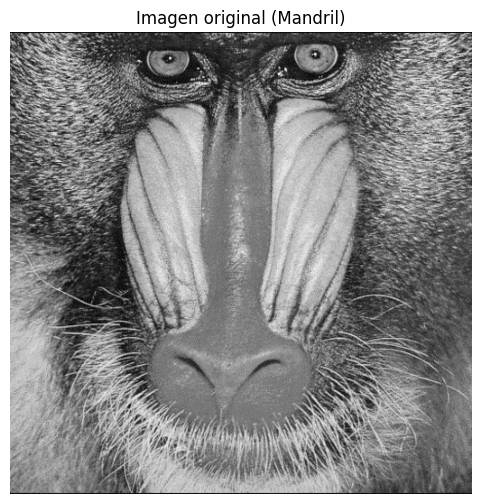

Shape: (512, 512)
Máximo valor: 255
Mínimo valor: 0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v3 as iio
from skimage.color import rgb2gray

# Cargar imagen
X = iio.imread("mandril.png")

# Convertir a escala de grises si es RGB
if X.ndim == 3:
    X = (rgb2gray(X) * 255).astype(np.uint8)

# Mostrar imagen
plt.figure(figsize=(6,6))
plt.imshow(X, cmap='gray')
plt.title("Imagen original (Mandril)")
plt.axis('off')
plt.show()

# Mostrar información básica
print("Shape:", X.shape)
print("Máximo valor:", X.max())
print("Mínimo valor:", X.min())

## 🔽 3. Downsampling (reducción de resolución)

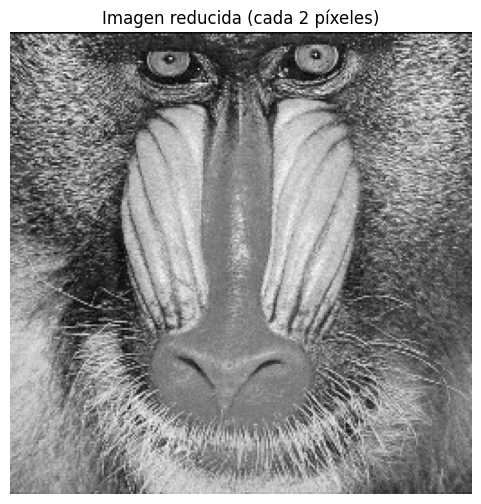

Shape de imagen reducida: (256, 256)


In [5]:
d = 2
(Nx, Mx) = X.shape
ix = range(0, Nx, d)
jx = range(0, Mx, d)
Ny = len(ix)
My = len(jx)

Y = np.zeros((Ny, My), np.uint8)
for i in range(Ny):
    for j in range(My):
        Y[i, j] = X[ix[i], jx[j]]

plt.figure(figsize=(6,6))
plt.imshow(Y, cmap='gray')
plt.title(f"Imagen reducida (cada {d} píxeles)")
plt.axis('off')
plt.show()

print("Shape de imagen reducida:", Y.shape)

## 🎨 4. Reducción de niveles de gris (posterización)

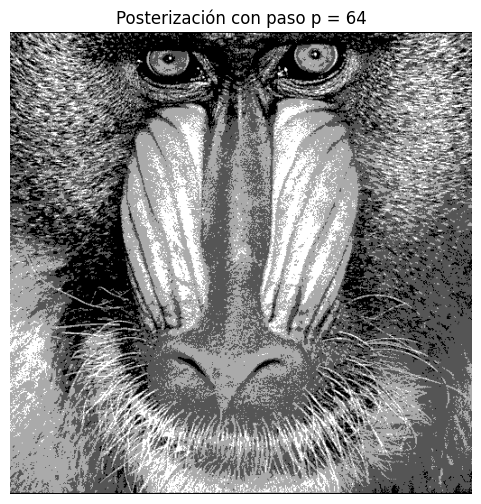

Esta imagen tiene = 4 niveles de gris


In [6]:
p = 64
(Nx, Mx) = X.shape
Y = np.zeros((Nx, Mx), np.uint8)
for i in range(Nx):
    for j in range(Mx):
        x = int(np.fix(X[i,j]/p)*p)
        Y[i,j] = x

plt.figure(figsize=(6,6))
plt.imshow(Y, cmap='gray')
plt.title(f"Posterización con paso p = {p}")
plt.axis('off')
plt.show()

print('Esta imagen tiene =', int(256/p), 'niveles de gris')

## ⚙️ 6. Función vectorizada `ScaleGray`

Prpuesta de IGNACIO MENDIOLA

La propuesta de Ignacio Mendiola fue una manera sencilla y vectorizada de hacer la posterización de una imagen, o sea, reducir la cantidad de niveles de gris.

Esto fue lo que propuso:

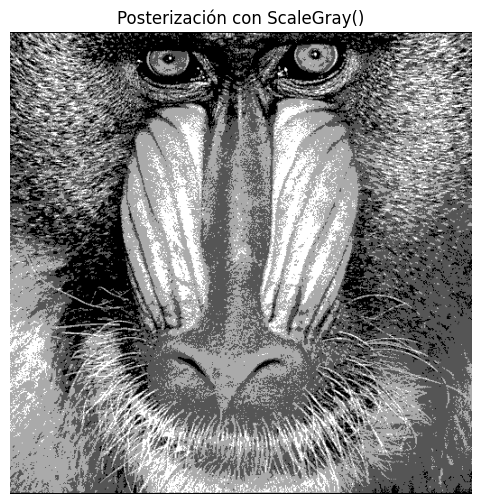

In [7]:
def ScaleGray(img: np.ndarray, d: int) -> np.ndarray:
    return np.floor_divide(img, d) * d

Y_vec = ScaleGray(X, p)

plt.figure(figsize=(6,6))
plt.imshow(Y_vec, cmap='gray')
plt.title("Posterización con ScaleGray()")
plt.axis('off')
plt.show()

✅ ¿Qué hace esta función?\
Reduce los niveles de gris de la imagen img usando como paso d, de forma más rápida y sin bucles.

Es equivalente a esto que se hacía con for:

In [8]:
for i in range(Ny):
    for j in range(My):
        x = int(np.fix(X[i,j]/p) * p)
        Y[i,j] = x


Pero Ignacio lo resolvió con una sola línea usando operaciones de NumPy.

## 📊 5. Histograma de la imagen

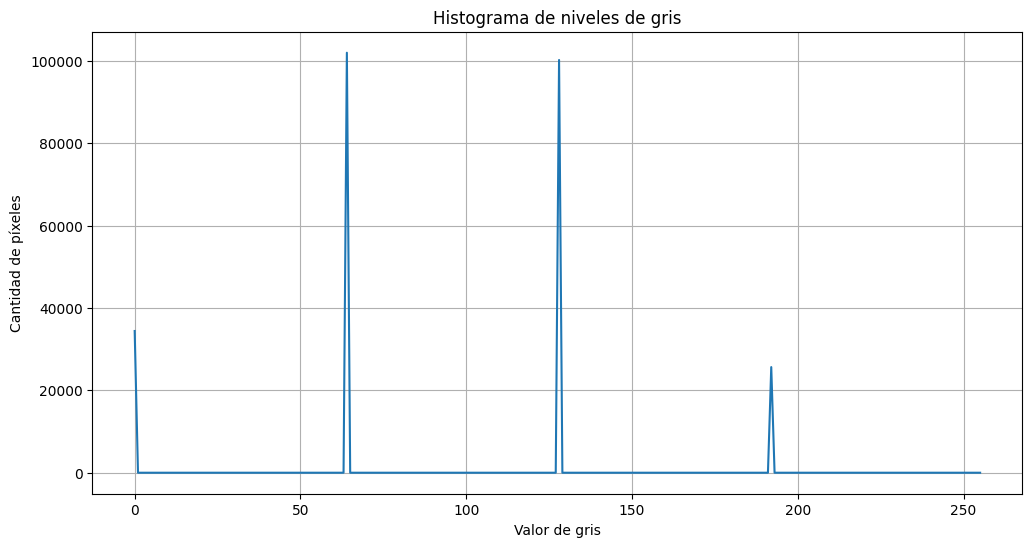

In [9]:
def imhist(X,n=256):
  (N,M) = X.shape
  h = np.zeros((n,))
  for i in range(N):
    for j in range(M):
      x = X[i,j]
      h[x] = h[x]+1
  return h

n = 256
h = imhist(Y, n=n)
plt.figure(figsize=(12,6))
plt.plot(range(n), h[:n])
plt.title("Histograma de niveles de gris")
plt.xlabel("Valor de gris")
plt.ylabel("Cantidad de píxeles")
plt.grid()
plt.show()